# Crime Trail Blazers Analysis

In [1]:
# Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

In [2]:
dow_table = 'Output/day_of_week_table.csv'
total_table = 'Output/game_status_table.csv'
gameday_table = 'Output/gameday_table.csv'
month_year = 'Output/month_year_crime.csv'

In [3]:
# The correct encoding must be used to read the CSV in pandas
dow_table_df = pd.read_csv(dow_table, encoding="ISO-8859-1")
total_table_df = pd.read_csv(total_table, encoding="ISO-8859-1")
gameday_table_df = pd.read_csv(gameday_table, encoding="ISO-8859-1")
month_year_df = pd.read_csv(month_year, encoding="ISO-8859-1")

## Bar Chart: Average Crime Count per Type of Game

In [4]:
# Reset the index to GameStatus
total_table_df.set_index('GameStatus', inplace=True)

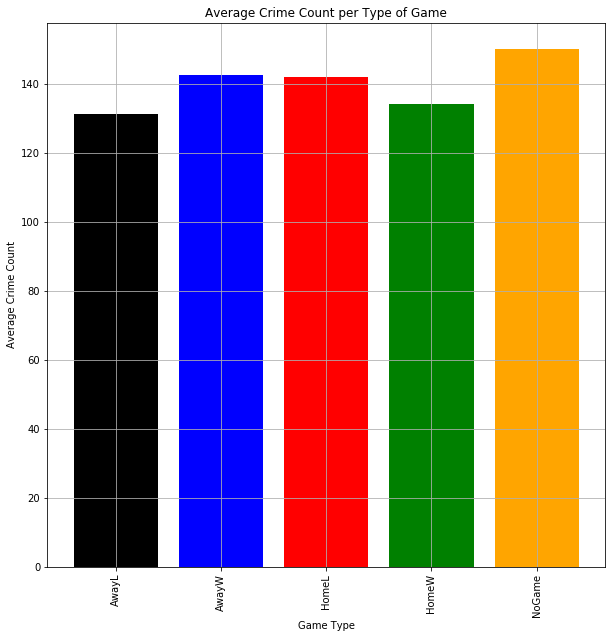

In [5]:
# Visualization: Average Crime Count per Type of Game
avg_crime = total_table_df['AverageCrime']
colors = ["black","blue","red","green", "orange"]
count_chart = avg_crime.plot(kind='bar', color=colors, width=0.8, figsize=(10, 10))
plt.title("Average Crime Count per Type of Game")
count_chart.set_xlabel("Game Type")
count_chart.set_ylabel("Average Crime Count")
plt.grid()
plt.savefig("Output/AverageCrimeCountperTypeofGame(#1).png")
plt.show()

## Line Graph: Total Crime Count per Month for Each Year

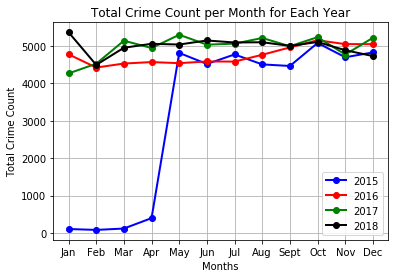

In [6]:
# Visualization: Total Crime Count per Month for Each Year
month_crime_gb = month_year_df.groupby("Month_Year")["Date"]
per_month_gb_df = pd.DataFrame(month_crime_gb.size().reset_index(name = "Crime_Count_Per_Month"))
month_2015 = per_month_gb_df.iloc[0:12]
month_2016 = per_month_gb_df.iloc[12:24]
month_2017 = per_month_gb_df.iloc[24:36]
month_2018 = per_month_gb_df.iloc[36:48]
x_axis = np.arange(1, 13, 1)
y_2015 = month_2015['Crime_Count_Per_Month']
month_2015, = plt.plot(x_axis, y_2015, marker="o",color="blue", linewidth=2, label="2015")
y_2016 = month_2016['Crime_Count_Per_Month']
month_2016, = plt.plot(x_axis, y_2016, marker="o",color="red", linewidth=2, label="2016")
y_2017 = month_2017['Crime_Count_Per_Month']
month_2017, = plt.plot(x_axis, y_2017, marker="o",color="green", linewidth=2, label="2017")
y_2018 = month_2018['Crime_Count_Per_Month']
month_2018, = plt.plot(x_axis, y_2018, marker="o",color="black", linewidth=2, label="2018")
plt.legend()
plt.grid()
plt.title("Total Crime Count per Month for Each Year")
plt.xlabel("Months")
plt.ylabel("Total Crime Count")
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, ["Jan", "Feb", "Mar", "Apr", "May","Jun","Jul","Aug","Sept","Oct","Nov","Dec"])
#plt.ylim(4000,12000)
plt.savefig("Output/TotCrimeCountForEachYear(#2).png")
plt.show()

## Line Graph: Total Crime Count per Month for Each Year for 3 NBA Seasons

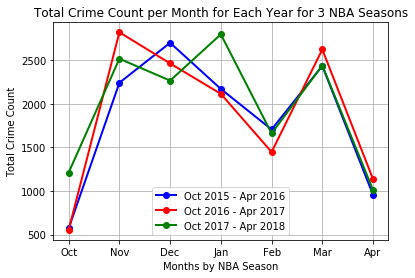

In [7]:
# Visualization: Oct to Apr by season
has_game = gameday_table_df.loc[gameday_table_df["HasGame"] == True, :]
has_game_sort = has_game.sort_values(by="Date").reset_index(drop=True)
has_game_sort_gb = has_game_sort.groupby("Month_Year")["Num_times"].sum()
has_game_df = has_game_sort_gb.to_frame()
has_game_df = has_game_df.reset_index()
game_2015 = has_game_df.iloc[4:11]
game_2016 = has_game_df.iloc[11:18]
game_2017 = has_game_df.iloc[18:25]
x_axis = np.arange(1, 8, 1)
y_2015 = game_2015['Num_times']
month_2015, = plt.plot(x_axis, y_2015, marker="o",color="blue", linewidth=2, label="Oct 2015 - Apr 2016")
y_2016 = game_2016['Num_times']
month_2016, = plt.plot(x_axis, y_2016, marker="o",color="red", linewidth=2, label="Oct 2016 - Apr 2017")
y_2017 = game_2017['Num_times']
month_2017, = plt.plot(x_axis, y_2017, marker="o",color="green", linewidth=2, label="Oct 2017 - Apr 2018")
plt.legend()
plt.grid()
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, ["Oct","Nov","Dec","Jan", "Feb", "Mar", "Apr"])
plt.title("Total Crime Count per Month for Each Year for 3 NBA Seasons")
plt.xlabel("Months by NBA Season")
plt.ylabel("Total Crime Count")
plt.savefig("Output/TotCrimeCountForEachYearfor3NBAseasons(#3).png")
plt.show()

## Bar Chart: No Games vs. All Home Games

In [8]:
gp_table_reset = dow_table_df.reset_index()
awayL_bar = gp_table_reset.loc[gp_table_reset["GameStatus"] == "AwayL", :]
awayW_bar = gp_table_reset.loc[gp_table_reset["GameStatus"] == "AwayW", :]
homeL_bar = gp_table_reset.loc[gp_table_reset["GameStatus"] == "HomeL", :]
homeW_bar = gp_table_reset.loc[gp_table_reset["GameStatus"] == "HomeW", :]
nogame_bar = gp_table_reset.loc[gp_table_reset["GameStatus"] == "NoGame", :]

In [9]:
#In case we want to use any of the other values for another bar graph DON'T DELETE
x = awayL_bar["AverageDailyCrimes"].values
y = awayW_bar["AverageDailyCrimes"].values
z = homeL_bar["AverageDailyCrimes"].values
a = homeW_bar["AverageDailyCrimes"].values
no_games_avg_list = nogame_bar["AverageDailyCrimes"].values

In [10]:
#home games avg crimes commited for each day of the week for the bar graph
home_games = (homeW_bar["OffenseCategory"].values+homeL_bar["OffenseCategory"].values)/(homeW_bar["Date"].values+homeL_bar["Date"].values)

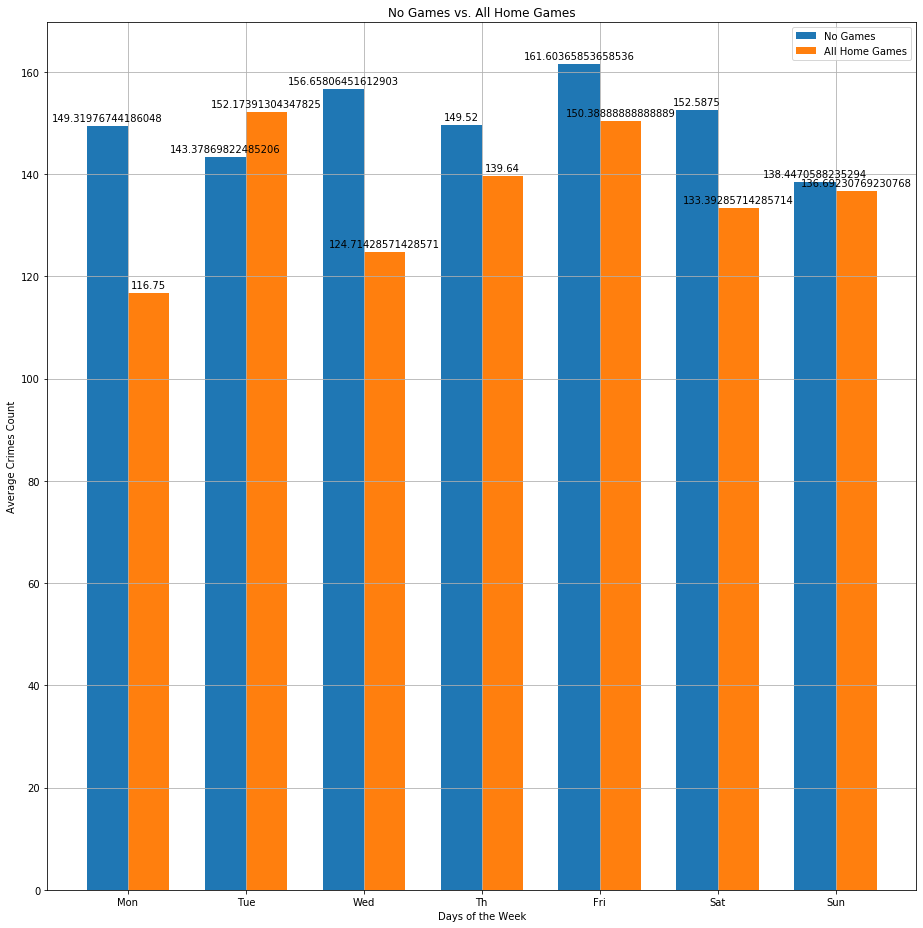

In [11]:
labels = ['Mon', 'Tue', 'Wed', 'Th', 'Fri','Sat','Sun']

x = np.arange(len(labels)) 
width = 0.35

fig, ax = plt.subplots(figsize=(13,13))
rects1 = ax.bar(x - width/2, no_games_avg_list, width, label='No Games')
rects2 = ax.bar(x + width/2, home_games, width, label='All Home Games')

ax.set_ylabel('Average Crimes Count')
ax.set_xlabel('Days of the Week')
ax.set_title('No Games vs. All Home Games')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()
ax.grid()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.savefig("Output/AverageCrimeCountperDayoftheWeek(#4).png")
plt.show()

## ANOVA Test

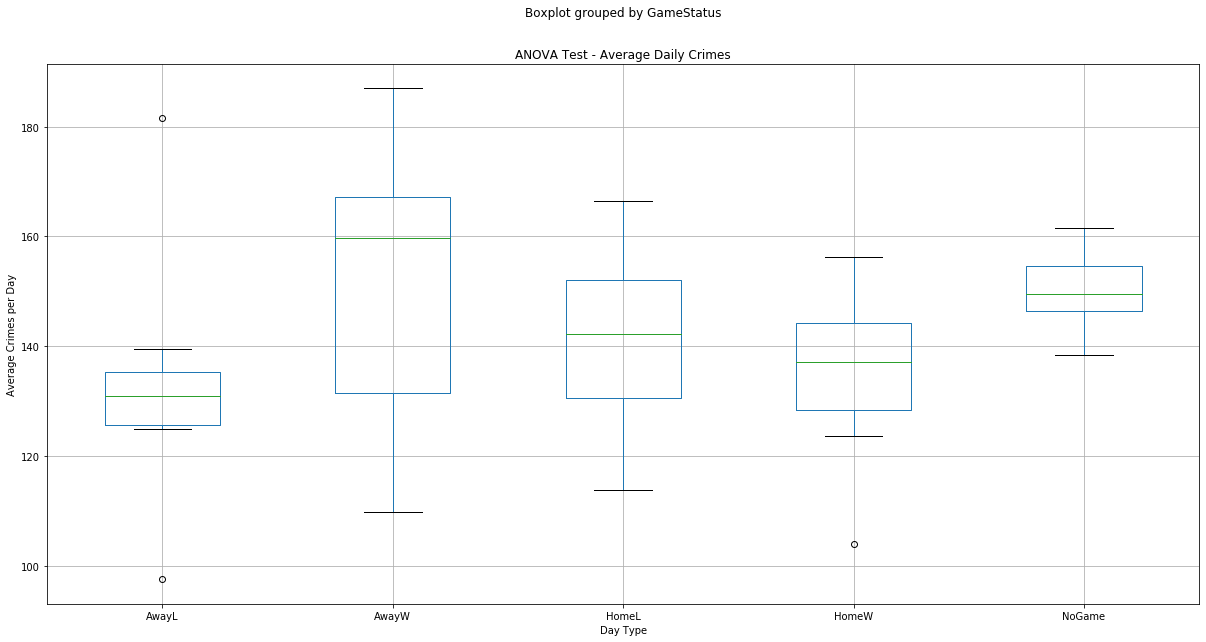

In [12]:
# ANOVA Test of Crime Data for type of day
dow_table_df.boxplot("AverageDailyCrimes", by="GameStatus", figsize=(20, 10))
plt.title('ANOVA Test - Average Daily Crimes')
plt.xlabel('Day Type')
plt.ylabel('Average Crimes per Day')
# Save the figure
plt.savefig("Output/anova.png")

In [13]:
# Extract individual groups
group1 = dow_table_df[dow_table_df["GameStatus"] == "AwayL"]["AverageDailyCrimes"]
group2 = dow_table_df[dow_table_df["GameStatus"] == "AwayW"]["AverageDailyCrimes"]
group3 = dow_table_df[dow_table_df["GameStatus"] == "HomeL"]["AverageDailyCrimes"]
group4 = dow_table_df[dow_table_df["GameStatus"] == "HomeW"]["AverageDailyCrimes"]
group5 = dow_table_df[dow_table_df["GameStatus"] == "NoGame"]["AverageDailyCrimes"]

In [14]:
# Perform the ANOVA
stats.f_oneway(group1, group2, group3, group4, group5)

F_onewayResult(statistic=1.1340141701922277, pvalue=0.35933907485470207)

## Independent TTest Game Days vs No Game

In [15]:
# Set Population for Game Days
population1 = gameday_table_df[gameday_table_df["HasGame"] == True]
population1.Num_times.mean()

136.31632653061226

In [24]:
gameday_table_df

,Unnamed: 0,Date,Num_times,HasGame,Month_Year
0,0,2015-05-12,161,False,2015-05
1,1,2015-05-01,195,False,2015-05
2,2,2015-05-02,176,False,2015-05
3,3,2015-05-03,130,False,2015-05
4,4,2015-05-04,143,False,2015-05
...,...,...,...,...,...
1454,1454,2018-12-28,152,False,2018-12
1455,1455,2018-12-29,129,False,2018-12
1456,1456,2018-12-30,143,False,2018-12
1457,1457,2018-12-31,136,False,2018-12


In [16]:
# Set Population for Non-Game Days
population2 = gameday_table_df[gameday_table_df["HasGame"] == False]
population2.Num_times.mean()

150.0635193133047

In [17]:
# Run T Test
stats.ttest_ind(population1.Num_times, population2.Num_times, equal_var=False)

Ttest_indResult(statistic=-3.6345215223213727, pvalue=0.000318818563354103)

In [32]:
# Plot sample means with error bars
tick_labels = ["Game Day", "No Game"]

means = [population1.Num_times.mean(), population2.Num_times.mean()]
x_test = np.arange(0, len(means))

sem = [population1.Num_times.sem(), population2.Num_times.sem()]

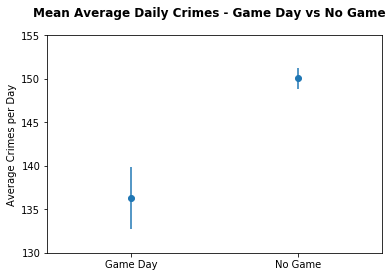

In [33]:
# Plot mean of game day vs non-game day
fig, ax = plt.subplots()

fig.suptitle("Mean Average Daily Crimes - Game Day vs No Game",
             fontsize=12, fontweight="bold")

ax.errorbar(x_test, means, yerr=sem, fmt="o")

ax.set_xlim(-0.5, 1.5)
ax.set_ylim(130, 155)

ax.set_xticklabels(tick_labels)
ax.set_xticks([0, 1])

ax.set_ylabel("Average Crimes per Day")

# Save the figure
plt.savefig("Output/ttest.png")
plt.show()

## Chi Square Test

In [117]:
total_table_df

,OffenseCategory,Date,AverageCrime
GameStatus,,,
AwayL,11284,86,131.209302
AwayW,8687,61,142.409836
HomeL,6953,49,141.897959
HomeW,13150,98,134.183673
NoGame,174815,1165,150.055794


In [118]:
observed = pd.Series(total_table_df["AverageCrime"], index=["AwayL", "AwayW", "HomeL","HomeW", "NoGame"])
observed

AwayL     131.209302
AwayW     142.409836
HomeL     141.897959
HomeW     134.183673
NoGame    150.055794
Name: AverageCrime, dtype: float64

In [119]:
# Calculate expected value
expected = total_table_df["OffenseCategory"].sum()/total_table_df["Date"].sum()
print(f"Expected Crime per Day: {expected}")

Expected Crime per Day: 147.28512679917753


In [120]:
# Create a data frame
df = pd.DataFrame([observed]).T

In [121]:
# Add a column whose default values are the expected values
df[1] = expected

In [122]:
# Rename columns
df.columns = ["observed", "expected"]
df

,observed,expected
AwayL,131.209302,147.285127
AwayW,142.409836,147.285127
HomeL,141.897959,147.285127
HomeW,134.183673,147.285127
NoGame,150.055794,147.285127


In [123]:
# The degree of freedom is 5-1 = 4
# With a p-value of 0.05, the confidence level is 1.00-0.05 = 0.95.
critical_value = stats.chi2.ppf(q = 0.95, df = 4)
critical_value

9.487729036781154

In [124]:
# Run the chi square test with stats.chisquare()
stats.chisquare(df['observed'], df['expected'])

Power_divergenceResult(statistic=3.330593209674438, pvalue=0.5040996778072848)